## Audioprojekt - Audiobearbeitung
### Ziel
Audiodatein sollen eingelesen werden können, um diese dann grafisch darzustellen.
Diese sollen diese dann durch einen Hochpass `highpass`, Tiefpass `lowpass` und somit auch einem Bandpass, der durch diese zwei Funktionen genutzt werden kann.

Weiters wurde eine Funktion zur Erstellung eines Echos hinzugefügt.
Mithilfe dieser kann man ein Echo, dass an einem virtuellen Reflektor reflektiert simulieren.
Dazu muss nur die `distance` in Metern angegeben werden und zusätzlich, der Faktor ausgewählt werden, indem das Echo pro Distanz abnehmen soll. Das wurde mithilfe eines Dropdown menüs realisiert. 

In [80]:
import os

import ipywidgets as widgets
from ipywidgets import interact, fixed, RadioButtons

import matplotlib.pyplot as plt
from IPython.display import display

from thinkdsp import read_wave, decorate, Wave

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [81]:
audio_file = 'maria.wav'

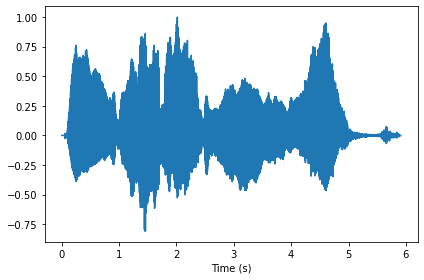

In [82]:
wave = read_wave(audio_file)
wave.plot()

imported_audio = wave.make_audio()
display(imported_audio)
decorate(xlabel='Time (s)')

In [83]:
def filter_wave(wave, start, duration, highpass, lowpass):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(highpass)
    spectrum.high_pass(lowpass)
    spectrum.plot(color='#045a8d')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

## Tiefpass, Hochpass, Bandpass
Start: Gibt an, ab wann die Audiodatei abgespielt wird (Sekunden)
Duration: Gibt an, wie lang die Audiodatei abgespielt wird (Sekunden)
Cutoff: Gibt an welche tiefen Frequenzen herrausgefiltert werden (Frequenz)
Cutoff_high: Gibt an welche hohen Frequnezen herruasgefiltert werden (Frequenz)

Mithilfe des Cutoff und des Cutoff_high, entsteht ein sogenannter Bandpass.
Damit kann man zum Beispiel nur Frequnezen zwischen 3000Hz und 6000Hz durchlassen, alle anderen werden gefiltert.

In [84]:
wave = read_wave(audio_file)
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), highpass=(0, 10000, 1000), lowpass=(0, 10000, 1000));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

In [85]:
import numpy as np

In [86]:
from operator import mul
from functools import reduce
from math import exp
from math import floor

## Echo hinzufügen
Mithilfe dieses Tools ist es möglich einen Echo effekt zu erzeugen.
Es kann dabei entschieden werden wie weit sich der jeweilige "Echo-Reflektor" entfernt befindet.
Je weiter der Reflektor entfernt ist, desto leiser kommt das Echo zurück. Weiters wird das Echo auch immer leiser, je weiter es "reisen" muss. 

In [87]:
def add_echo(wave, distance, echo_decay,):
    
    if distance < 1:
        wave.plot()
        display(wave.make_audio())
        return
    else:
        echo_data = (wave.ys)
        echo_time = (wave.ts)
        framerate = (wave.framerate)
        
        time_delay = distance * 2 / 343.2
        delay = floor(framerate * time_delay)
        zeros = np.zeros(delay) # Verzögerung
        audio_echo = np.concatenate([zeros, echo_data]) # verzögertes Audiosignal
        audio_out = np.concatenate([echo_data, zeros]) # orignal + Leerzeit für Echo

        #delay
        if echo_decay == 1:
            factor = 0;
        elif echo_decay == 2:
            factor = max(1-time_delay*0.5, 0)
        elif echo_decay == 3:
            factor = exp(-time_delay*0.5)
        else:
            print("Wrong Value!")
            return

        wave.ys = audio_out + (audio_echo * factor) # addieren
        wave.ts = np.arange(0, wave.ts[-1] + (time_delay), 1/framerate) # np.arange(start, end, step)

        wave.plot()
        display(wave.make_audio())
        return

In [88]:
echo_decay = widgets.Dropdown(
            options=[('No echo', 1), ('Linear', 2), ('Exponential', 3)],
            value=2,
            description='Reduction:',
        )
echo_decay

Dropdown(description='Reduction:', index=1, options=(('No echo', 1), ('Linear', 2), ('Exponential', 3)), value…

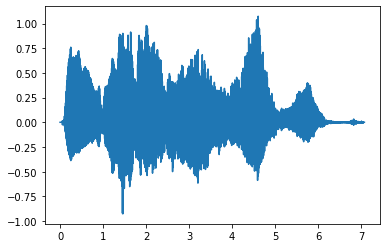

In [89]:
wave = read_wave(audio_file)
add_echo(wave, 200, echo_decay.value)

## Notes

https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#File-Upload


Optinal könnten auch die Funktionen der Audioaufnahme eingebaut werden. Das inkludiert eine `record`, eine `play`, eine `save` und möglicherweise auch eine `cut` funktion.

scale

def make_wave(self, duration=1, start=0, framerate=11025):
        n = round(duration * framerate)
        ts = start + np.arange(n) / framerate
        ys = self.evaluate(ts)
        return Wave(ys, ts, framerate=framerate)

audio_echo = np.concatenate([zeros, echo_data])
zeros= np.zeros(framerate)

uploader = widgets.FileUpload()

display(uploader)

uploader.value

uploaded_file = uploader.value[0]
uploaded_file

uploaded_file = uploader.value
#=> 36

with open("./saved-output.wav", "wb") as fp:
    fp.write(uploaded_file.content)

uploaded_file['value']

wave = read_wave(uploaded_file)

uploader = widgets.FileUpload()

display(uploader)uploaded_file = uploader.value[0]
uploaded_fileuploaded_file = uploader.value
#=> 36with open("./saved-output.wav", "wb") as fp:
    fp.write(uploaded_file.content)uploaded_file['value']wave = read_wave(uploaded_file)